In [1]:
#Pytorch computer vision

#0.Computer vision libaries in Pytorch

#'torchvision' -base domain library for  Pytorch computer vision. look the resoource online
#torchvision.datasets - get the datasets and data loading functions for computer vision here
#torchvision.models - get pretrained computer vision models that you can leverage for your own problems
#torchvision.transforms - functionsfor manipulating your vision data(images) to be suitable for use with an ML model
#torch.utils.data.Dataset - Base dataset class for pyTorch
#torch.utils.data.DataLoader - Create a python iterable over a dataset



In [2]:
import torch
from torch import nn

#Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#Imprt matpotlib for visualization

import matplotlib.pyplot as plt

#check versions
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu121
0.20.1+cu121


# 1.Getting the datasets

In [3]:
# We are using fashion MNIST dataset

#Setup Training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", #where to download data to
    train = True, #we want the training datasets
    download=True,
    transform=ToTensor(), # How do we want ot transform the data
    target_transform=None #how do we want to tranfrom the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform= ToTensor(),
    target_transform=None

)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.1MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 196kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.65MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.46MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
#See First training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
#Check the shape of our image
print(f"image shape:{image.shape}->[color_channels, height, width]"),
print(f"Image label:{class_names[label]}")

image shape:torch.Size([1, 28, 28])->[color_channels, height, width]
Image label:Ankle boot


 ## 1.2 Visualize our data

Image shape:torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

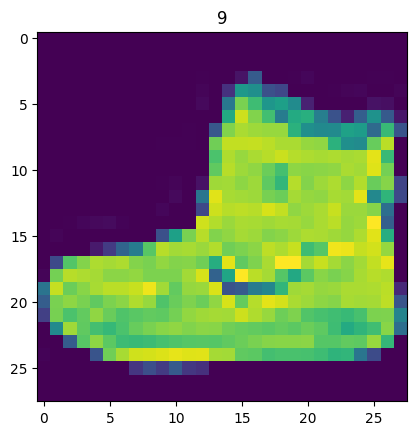

In [12]:
import matplotlib.pyplot as plt
image, label = train_data[0]

print(f"Image shape:{image.shape}")
plt.imshow(image.squeeze())
plt.title(label) # if we are printing the label 9 it would show Ankle boot from above output list

(-0.5, 27.5, 27.5, -0.5)

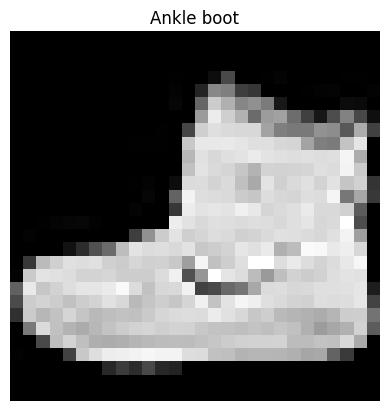

In [15]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

In [16]:
#plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


<Figure size 900x900 with 0 Axes>